In [2]:
import re
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import umap
import nltk
import spacy
import string

import matplotlib.pyplot as plt
from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')
import seaborn as sns
sns.set(style='white', rc={'figure.figsize':(10,8)})

np.random.seed(42)
%config Completer.use_jedi = False
pd.set_option('display.max_columns', 30)
# pd.set_option('display.max_rows', 100)

nlp = spacy.load("en_core_web_sm")

In [3]:
df = pd.read_csv('octopus_energy_fb_comments.csv')
df.head()

,Unnamed: 0,fb_comment
0,0,Congratulations Laura
1,1,Rang u as my smart meter ain't working on scre...
2,2,"I just applied switched to Octopus , but can I..."
3,3,What do I need to do to get smart metres...
4,4,Could of phoned me


In [4]:
df.fb_comment[0:20].tolist()

['Congratulations Laura',
 "Rang u as my smart meter ain't working on screen for dual fuel still can't see what I'm using ? ",
 'I just applied switched to Octopus , but can I check in advanced if my building is qualified to install Smart Meter please? Thank you',
 'What do I need to do to get smart metres...',
 'Could of phoned me ',
 "I'm sure I was the millionth customer but I missed my phone call off you guys. Happy to take the prize still 😬",
 'What about loyal customers? All we get is an increased bill!!!!',
 "Is there any news on coming to northern ireland, I'd love to switch",
 'Fantastic news 📰 ',
 'Well done Octopus 🐙. Another happy customer!!',
 'Hi I’d like to know when I will get my balance back to my account as have left you now and had quite a bit of money in my account. Thanks ',
 'Best decision to join these. So can wait for the final switch day for gas then be happily set. The staff are lovely and everything gets sorted. Wish I could know how to get one of the teddy o

In [5]:
df.fb_comment.replace("\S*http\S*" , "", regex=True, inplace = True)
df.fb_comment.replace("_" , " ", regex=True, inplace = True)
df.fb_comment.replace("^" , " ", regex=True, inplace = True)

In [6]:
for i in string.punctuation:
    try:
        df.fb_comment.replace(f"\{i}" , "", regex=True, inplace = True)
    except: pass

In [7]:
junk_words = "ve xx tqvm yessssssssssit youuuuuu nan nt citi kashif a very were yet than through via here rishisunak more much getting go going ive dont able when which who year barclays hsbcin amp like an no any since after banking im there out how starlingbank starling one only again over other then am may some do cant about banks would could its even their after has them get got within now all just if what or at had hsbcukbusiness up by into will an was our us so been hsbcuk co om ke ha gone your we can from as but to the hsbc and of you for are have they is my hsbc_uk with it in on this ðÿ be not bank me that"
junk_words_list = junk_words.split(" ")

In [8]:
def remove_unicode(text):

    try:
        text = text.encode("latin_1").decode("raw_unicode_escape").encode('utf-16', 'surrogatepass').decode('utf-16')
    except:
        text = text

    emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642" 
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
        "]+", re.UNICODE)

    text = re.sub(emoji_pattern, '', str(text))
    text = ''.join(text.split('\\n')) # to remove uncompiled \n
    text = re.sub('\n', '', text)     # to remove compiled \n

    return text

In [9]:
def word_root(text):
    list_data3=[]
    text = remove_unicode(text)
    doc = nlp(text)
    for token in doc:
        if token.text.isalpha() and len(token.text)>2:
            lemma = token.lemma_
            list_data3.append(lemma)
        else:pass
    return " ".join(list_data3)
df.fb_comment = df.fb_comment.apply(lambda x: word_root(str(x).lower()))  

In [10]:
df.fb_comment[0:20].tolist()

['congratulation laura',
 'ring smart meter work screen for dual fuel still see what use',
 'just apply switch octopus but can check advanced building qualified install smart meter please thank you',
 'what need get smart metre',
 'could phone',
 'sure be the millionth customer but miss phone call off you guy happy take the prize still',
 'what about loyal customer all get increase bill',
 'there any news come northern ireland love switch',
 'fantastic news',
 'well do octopus another happy customer',
 'like know when will get balance back account have leave you now and have quite bit money account thank',
 'good decision join these can wait for the final switch day for gas then happily set the staff be lovely and everything get sorted wish could know how get one the teddy octopus though there cute',
 'brilliant pleased that change octopus energy will never change wish have find you soon',
 'well do xxx',
 'octopus very very active they instal smart meter home day',
 'amazing',
 'nice 

In [11]:
df_clean = df.fb_comment
df_clean = df_clean.dropna()
list_data = df_clean.to_list()
list_data = [str(sent) for sent in list_data]

In [12]:
len(list_data)

768

In [13]:
from sentence_transformers import SentenceTransformer

In [14]:
# distilbert-base-nli-mean-tokens
# paraphrase-distilroberta-base-v1

In [15]:
model1=SentenceTransformer('distilbert-base-nli-mean-tokens')
embeddings1 = model1.encode(list_data, show_progress_bar=True)

Batches:   0%|          | 0/24 [00:00<?, ?it/s]

In [16]:
# paraphrase-distilroberta-base-v1

In [17]:
model2=SentenceTransformer('xlm-r-distilroberta-base-paraphrase-v1')
embeddings2 = model2.encode(list_data, show_progress_bar=True)

Batches:   0%|          | 0/24 [00:00<?, ?it/s]

In [18]:
model3=SentenceTransformer('roberta-large-nli-stsb-mean-tokens')
embeddings3 = model3.encode(list_data, show_progress_bar=True)

Batches:   0%|          | 0/24 [00:00<?, ?it/s]

In [19]:
model4=SentenceTransformer('allenai-specter')
embeddings4 = model4.encode(list_data, show_progress_bar=True)

Batches:   0%|          | 0/24 [00:00<?, ?it/s]

In [20]:
UMAP_bert1 = umap.UMAP(n_components=5).fit_transform(embeddings1)

UMAP_bert2 = umap.UMAP(n_components=5).fit_transform(embeddings2)

UMAP_bert3 = umap.UMAP(n_components=5).fit_transform(embeddings3)

UMAP_bert4 = umap.UMAP(n_components=5).fit_transform(embeddings4)

#n_neighbors=10, min_dist=0.0, 

In [21]:
from pyclustertend import hopkins

embeddings = {"UMAP_bert1" : UMAP_bert1, "UMAP_bert2" : UMAP_bert2,
              "UMAP_bert3" : UMAP_bert3, "UMAP_bert4" : UMAP_bert4}
              
embeds = {}

for key, emb in embeddings.items():
    embeds[key] = hopkins(emb,emb.shape[0])

embeds
# embeddings[embeds.index(min(embeds))]
# print(f"the hopkins score for embeddings {i} is : {hs}")

{'UMAP_bert1': 0.05812572283169769,
 'UMAP_bert2': 0.0411456971169246,
 'UMAP_bert3': 0.04809261729474881,
 'UMAP_bert4': 0.053743534042462085}

# Best Model Selection

In [22]:
best_embed_name = min(embeds, key=embeds.get)
best_embed_name = "UMAP_bert3"
best_model = embeddings[best_embed_name]
best_embed_name

'UMAP_bert3'

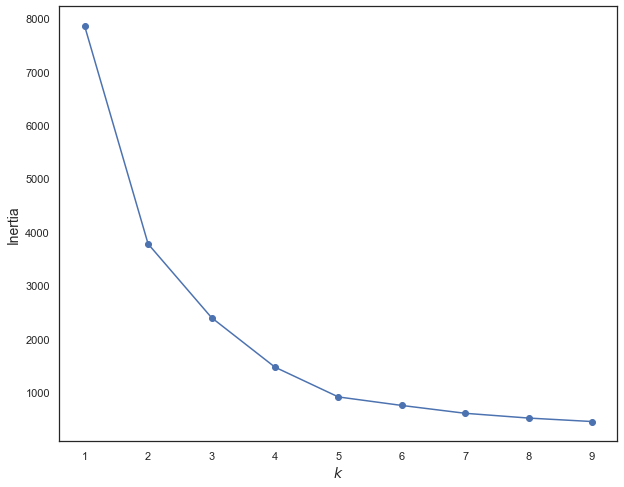

In [23]:
#inertia

kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(best_model)
                for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]

plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.show()

In [34]:
cluster = KMeans(n_clusters=5, init="k-means++").fit_predict(best_model)
centers = KMeans(n_clusters=6, init="k-means++").fit(best_model)


In [25]:
centers.cluster_centers_

array([[-3.810008  ,  4.7512836 ,  0.3758793 ,  8.447251  , 10.026576  ],
       [ 0.37058473,  7.0667706 ,  5.037073  ,  6.494627  ,  8.809854  ],
       [ 2.180819  ,  3.3870845 , -3.7109478 ,  9.86636   , 14.506712  ],
       [-1.3768779 ,  5.140506  ,  2.54577   ,  6.4723554 ,  8.752089  ],
       [-1.3187965 ,  4.249472  ,  1.060317  ,  7.3075256 , 10.464088  ],
       [-2.630775  ,  3.2468152 , -0.90638995,  9.329547  , 10.048208  ]],
      dtype=float32)

In [26]:
def plot(cluster = cluster):    

    clustered = (cluster >= 0)
    reduced_dim = umap.UMAP(n_components=2).fit_transform(embeddings3)



    unique, counts = np.unique(cluster, return_counts=True)
    print(dict(zip(unique, counts)))

    plt.scatter(reduced_dim[~clustered, 0],
                reduced_dim[~clustered, 1],
                c=(0.5,0.5,0.5),
                # s=1,
                alpha=0.5
                )
    plt.scatter(reduced_dim[clustered, 0],
                reduced_dim[clustered, 1],
                c=cluster[clustered],
                # s=1,
                cmap='Accent')
    plt.show()

{0: 180, 1: 179, 2: 247, 3: 147, 4: 15}


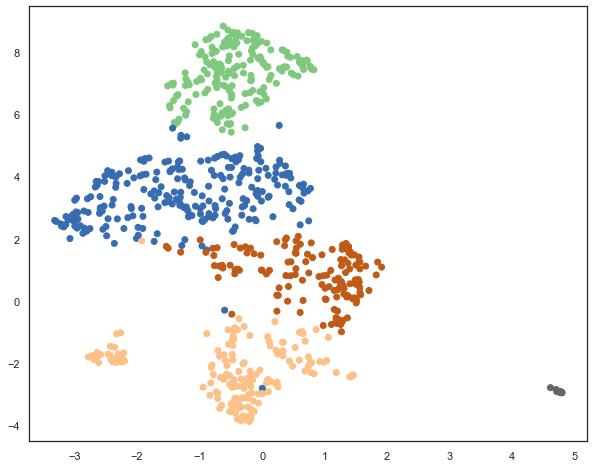

In [27]:
plot()

In [31]:
# #deleting junk clusters
try:
    del corpus
except: pass
corpus = pd.DataFrame(df_clean)
corpus["cluster"] = cluster
indexes = list(corpus[corpus.cluster == 4].index)
best_model = np.delete(best_model, indexes, 0)
corpus = corpus.drop(axis=0, index=indexes)

In [35]:
len(cluster)

753

In [33]:
len(corpus)

753

In [30]:
# del corpus
corpus = pd.DataFrame(df_clean)
corpus["cluster"] = cluster
corpus[corpus.cluster == 4]

,fb_comment,cluster
85,,4
101,,4
121,,4
124,,4
424,,4
490,order,4
519,,4
522,,4
530,,4
534,,4


In [36]:
del docs

NameError: name 'docs' is not defined

In [37]:
docs = pd.DataFrame(corpus.fb_comment)
docs["cluster"] = cluster
labeled_docs = docs.groupby(["cluster"], as_index=False).agg({"fb_comment": " ".join})
labeled_docs.fb_comment.replace(r"\S*octo\S*", "octopus", regex=True, inplace = True)
labeled_docs.fb_comment.replace(r"\S*octu\S*", "octopus", regex=True, inplace = True)
labeled_docs.fb_comment.replace(r"\S*wind\S*", "wind", regex=True, inplace = True)
labeled_docs.fb_comment.replace(r"\S*electric\S*", "electric", regex=True, inplace = True)
labeled_docs

,cluster,fb_comment
0,0,enter apple pie cupcake sharna greatbatch get ...
1,1,ring smart meter work screen for dual fuel sti...
2,2,there any news come northern ireland love swit...
3,3,congratulation laura could phone sure be the m...
4,4,just apply switch octopus but can check advanc...


In [82]:
labeled_docs = labeled_docs.dropna()
len(labeled_docs.fb_comment.tolist()[3].split(" "))


231

In [38]:
from keybert import KeyBERT
array_text = labeled_docs.fb_comment.tolist()

model_names = {"model1":'distilbert-base-nli-mean-tokens',
               "model2": "xlm-r-distilroberta-base-paraphrase-v1" ,
               "model3": 'roberta-large-nli-stsb-mean-tokens',
               "model4": "allenai-specter"}
    
kw_extractor = KeyBERT('xlm-r-distilroberta-base-paraphrase-v1')
k = 0
unigram = []
for j in range(len(array_text)):
    k+=1
    keywords = kw_extractor.extract_keywords(array_text[j],top_n=10,min_df=2)
    if not keywords:
        k -= 1
    else:
        unigram.append([word[0] for word in keywords])

In [39]:
kw_extractor = KeyBERT('xlm-r-distilroberta-base-paraphrase-v1')
bigram = []
k = 0
for j in range(len(array_text)):
    k+=1
    keywords = kw_extractor.extract_keywords(array_text[j],top_n=7,min_df=2,keyphrase_ngram_range=(1, 2))
    if not keywords:
        k -= 1
    else:
        bigram.append([word[0] for word in keywords])

In [40]:
kw_extractor = KeyBERT('xlm-r-distilroberta-base-paraphrase-v1')
trigram = []
k = 0
for j in range(len(array_text)):
    k+=1
    keywords = kw_extractor.extract_keywords(array_text[j],top_n=5,min_df=2,keyphrase_ngram_range=(1, 3))
    if not keywords:
        k -= 1
    else:
        trigram.append(word[0] for word in keywords)

In [41]:
unigram

[['cake',
  'apple',
  'cookie',
  'cupcake',
  'cranberry',
  'chocolate',
  'pastry',
  'bake',
  'enjoy',
  'favourite'],
 ['provider',
  'battery',
  'supplier',
  'overcharge',
  'electric',
  'supply',
  'pay',
  'charge',
  'meter',
  'generate'],
 ['lindsey',
  'liz',
  'sophie',
  'tonight',
  'switch',
  'caroline',
  'jess',
  'winspindy',
  'flick',
  'carlina'],
 ['excellent',
  'lucky',
  'thankyou',
  'congratulation',
  'niceone',
  'nice',
  'brilliant',
  'amazing',
  'awesome',
  'customer'],
 ['octopus',
  'octmy',
  'plush',
  'excellent',
  'quiz',
  'messsgesemail',
  'hoop',
  'note',
  'pick',
  'hello']]

In [42]:
bigram

[['apple cake',
  'cake apple',
  'apple cookie',
  'apple pie',
  'pie apple',
  'apple chocolate',
  'cake make'],
 ['pay electric',
  'send meter',
  'electric billing',
  'charge meter',
  'say meter',
  'buy electric',
  'meter switch'],
 ['switch lisa',
  'caroline allen',
  'johanne kirsty',
  'kate clinton',
  'tonight programme',
  'join lass',
  'lynn jamie'],
 ['great customer',
  'customer excellent',
  'fantastic customer',
  'brilliant customer',
  'happy customer',
  'great company',
  'customer happy'],
 ['fix octopus',
  'good octopus',
  'recommend octopus',
  'service octopus',
  'switch octopus',
  'thank octopus',
  'provider octopus']]

In [43]:
trigram

[<generator object <genexpr> at 0x0000024465933190>,
 <generator object <genexpr> at 0x00000244659336D0>,
 <generator object <genexpr> at 0x0000024465933CF0>,
 <generator object <genexpr> at 0x0000024465933EB0>,
 <generator object <genexpr> at 0x0000024465933900>]

In [405]:
for i in range(1,6):
    for j in range(3):
        print("Cluster", str(i)," :")
        print(trigram[j][0:2]+bigram[j][0:2]+unigram[j])

Cluster 1  :


TypeError: 'generator' object is not subscriptable